In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [3]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [4]:
import datetime
import pandas as pd


reference_date = datetime.datetime(1970, 1, 1)

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
        
        delta = ts - reference_date
        
        timestamp.append(delta.total_seconds())
    except ValueError as e:
        
        print(f"Error parsing {d} {t}: {e}")
        timestamp.append('Invalid')

timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values


final_data = data[data['Timestamp'] != 'Invalid']


final_data = final_data.drop(['Date', 'Time'], axis=1)

final_data.head()


Error parsing 1975-02-23T02:58:41.000Z 1975-02-23T02:58:41.000Z: time data '1975-02-23T02:58:41.000Z 1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y %H:%M:%S'
Error parsing 1985-04-28T02:53:41.530Z 1985-04-28T02:53:41.530Z: time data '1985-04-28T02:53:41.530Z 1985-04-28T02:53:41.530Z' does not match format '%m/%d/%Y %H:%M:%S'
Error parsing 2011-03-13T02:23:34.520Z 2011-03-13T02:23:34.520Z: time data '2011-03-13T02:23:34.520Z 2011-03-13T02:23:34.520Z' does not match format '%m/%d/%Y %H:%M:%S'


,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


In [5]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python 3.10\python.exe -m pip install --upgrade pip' command.


NameError: name 'cartopy' is not defined

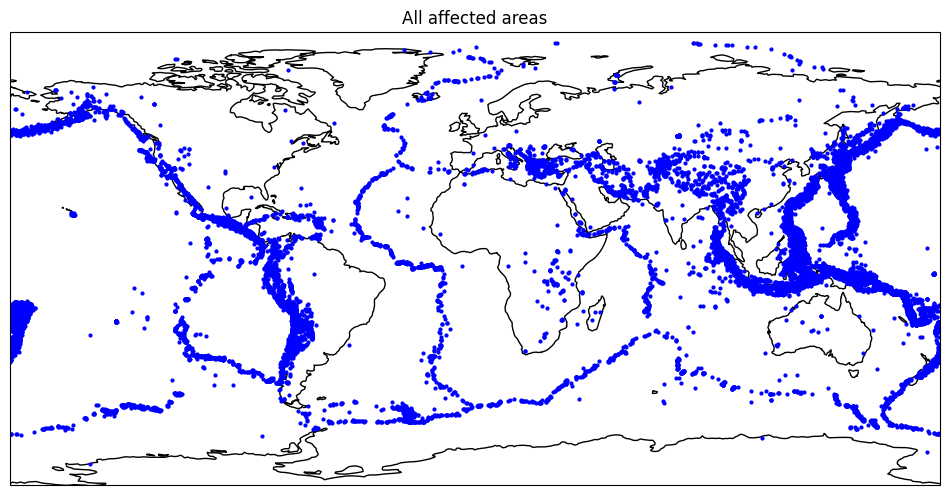

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a Cartopy map
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_title("All affected areas")

# Plot data points on the map
ax.plot(data["Longitude"], data["Latitude"], "bo", markersize=2)

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, color='coral')
ax.add_feature(cartopy.feature.LAKES, color='aqua')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')

plt.show()


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)


(18727, 3) (4682, 3) (18727, 2) (4682, 3)


In [9]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python 3.10\python.exe -m pip install --upgrade pip' command.


In [10]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [11]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python 3.10\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python 3.10\python.exe -m pip install --upgrade pip' command.


In [14]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

ModuleNotFoundError: No module named 'keras.wrappers'

In [15]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adadelta
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import numpy as np

# Define the function to create the model
def create_model(neurons=16, activation='relu', optimizer='adam', loss='binary_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(3,), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Define the parameters for grid search
param_grid = {
    'neurons': [16],
    'activation': ['sigmoid', 'relu'],
    'optimizer': [SGD(), Adadelta()],
    'loss': ['squared_hinge']
}

# Create the model
model = create_model()

# Create a custom scorer for accuracy
scorer = make_scorer(accuracy_score)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)


C:\Python 3.10\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: Cannot clone object '<Sequential name=sequential, built=True>' (type <class 'keras.src.models.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [16]:
from keras.models import clone_model
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import accuracy_score

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, **kwargs):
        self.build_fn = build_fn
        self.kwargs = kwargs

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.model_ = self.build_fn(**self.kwargs)
        self.model_.fit(X, y)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.model_.predict(X)

    def score(self, X, y):
        check_is_fitted(self)
        X, y = check_X_y(X, y)
        return accuracy_score(y, self.predict(X))

# Define the function to create the model
def create_model(neurons=16, activation='relu', optimizer='adam', loss='binary_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(3,), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Define the parameters for grid search
param_grid = {
    'neurons': [16],
    'activation': ['sigmoid', 'relu'],
    'optimizer': ['SGD', 'Adadelta'],
    'loss': ['squared_hinge']
}

# Create the wrapper instance
model = KerasClassifierWrapper(build_fn=create_model)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)


ValueError: Invalid parameter 'activation' for estimator KerasClassifierWrapper(build_fn=<function create_model at 0x0000023554805CF0>). Valid parameters are: ['build_fn'].

In [21]:
# Define the parameters for grid search
param_grid = {
    'neurons': [16],
    'optimizer': ['SGD', 'Adadelta'],
    'loss': ['squared_hinge']
}


In [22]:
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, **kwargs):
        self.build_fn = build_fn
        self.kwargs = kwargs

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.model_ = self.build_fn(**self.kwargs)
        self.model_.fit(X, y)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.model_.predict(X)

    def score(self, X, y):
        check_is_fitted(self)
        X, y = check_X_y(X, y)
        return accuracy_score(y, self.predict(X))

# Define the function to create the model
def create_model(neurons=16, optimizer='adam', loss='binary_crossentropy', activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(3,), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Define the parameters for grid search
param_grid = {
    'neurons': [16],
    'activation': ['sigmoid', 'relu'],
    'optimizer': ['SGD', 'Adadelta'],
    'loss': ['squared_hinge']
}

# Create the wrapper instance
model = KerasClassifierWrapper(build_fn=create_model)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)


ValueError: Invalid parameter 'activation' for estimator KerasClassifierWrapper(build_fn=<function create_model at 0x000002355617DFC0>). Valid parameters are: ['build_fn'].

In [22]:
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, **kwargs):
        self.build_fn = build_fn
        self.kwargs = kwargs

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.model_ = self.build_fn(**self.kwargs)
        self.model_.fit(X, y)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.model_.predict(X)

    def score(self, X, y):
        check_is_fitted(self)
        X, y = check_X_y(X, y)
        return accuracy_score(y, self.predict(X))

# Define the function to create the model
def create_model(neurons=16, optimizer='adam', loss='binary_crossentropy', activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(3,), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Define the parameters for grid search
param_grid = {
    'neurons': [16],
    'activation': ['sigmoid', 'relu'],
    'optimizer': ['SGD', 'Adadelta'],
    'loss': ['squared_hinge']
}

# Create the wrapper instance
model = KerasClassifierWrapper(build_fn=create_model)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)


ValueError: Invalid parameter 'activation' for estimator KerasClassifierWrapper(build_fn=<function create_model at 0x000002355617DFC0>). Valid parameters are: ['build_fn'].

In [23]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons=16, optimizer='SGD', loss='squared_hinge'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))  # Assuming X_train is your training data
    model.add(Dense(1, activation='sigmoid'))  # Assuming you have a binary classification task
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the parameters for grid search
param_grid = {
    'neurons': [16],
    'optimizer': ['SGD', 'Adadelta'],
    'loss': ['squared_hinge']
}


In [25]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Invalid parameter 'activation' for estimator KerasClassifierWrapper(build_fn=<function create_model at 0x000001ED5EC3E4D0>). Valid parameters are: ['build_fn'].

In [26]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

C:\Python 3.10\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0798 - loss: 0.5000 - val_accuracy: 0.0758 - val_loss: 0.5000
Epoch 2/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0832 - loss: 0.5000 - val_accuracy: 0.0758 - val_loss: 0.5000
Epoch 3/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0801 - loss: 0.5000 - val_accuracy: 0.0758 - val_loss: 0.5000
Epoch 4/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0841 - loss: 0.5000 - val_accuracy: 0.0758 - val_loss: 0.5000
Epoch 5/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0856 - loss: 0.5000 - val_accuracy: 0.0758 - val_loss: 0.5000
Epoch 6/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0783 - loss: 0.5000 - val_accuracy: 0.0758 - val_loss: 0.5000
Epoch 7/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0848 - loss: 0.5000 - val_accuracy: 0.0758 - val_loss: 0.5000
Epoch 8/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0811 - loss: 0.5000 -